In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('/content/uybor.xlsx')
df.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [3]:
df.shape # dataframe hajmi

(7421, 9)

In [4]:
df.isnull().sum() # dataframe ustunlaridagi null qiymatlar soni

address       0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

In [5]:
df.corr() # dataframe ustunlarining korrelyatsiyasi

,rooms,size,level,max_levels,price,lat,lng
rooms,1.000000,0.787697,0.139826,0.184896,0.552582,0.015092,0.013279
size,0.787697,1.000000,0.160907,0.276208,0.781830,0.030097,0.066416
level,0.139826,0.160907,1.000000,0.593245,0.059276,-0.027811,0.045332
max_levels,0.184896,0.276208,0.593245,1.000000,0.219737,-0.064064,0.039507
price,0.552582,0.781830,0.059276,0.219737,1.000000,0.015636,0.070309
lat,0.015092,0.030097,-0.027811,-0.064064,0.015636,1.000000,0.528706
lng,0.013279,0.066416,0.045332,0.039507,0.070309,0.528706,1.000000


In [6]:
df['district'].value_counts() # har bir tumandagi uylar soni

Chilonzor        1629
Mirzo Ulugbek    1360
Yunusobod         873
Uchtepa           870
Mirobod           767
Yakkasaroy        647
Yashnobod         459
Shayhontohur      371
Olmzor            264
Sergeli           159
Yangihayot         14
Bektemir            8
Name: district, dtype: int64

In [7]:
df.groupby('district').agg([min, max, np.mean])

rooms                ...        lng                      
                min max      mean  ...        min        max       mean
district                           ...                                 
Bektemir          1   4  2.750000  ...  69.270849  69.375913  69.306593
Chilonzor         1   8  2.367096  ...  69.155375  69.389860  69.201646
Mirobod           1  10  2.992177  ...  69.219014  69.332813  69.280116
Mirzo Ulugbek     1  10  2.544853  ...  69.223209  69.463557  69.332498
Olmzor            1   6  2.715909  ...  69.168933  69.320020  69.226534
Sergeli           1   6  2.836478  ...  69.197886  69.360758  69.236843
Shayhontohur      1   7  2.986523  ...  69.164452  69.305745  69.232835
Uchtepa           1   6  2.663218  ...  69.154116  69.294645  69.180468
Yakkasaroy        1   7  2.576507  ...  69.148915  69.389860  69.252344
Yangihayot        2   4  2.642857  ...  69.197886  69.240073  69.226044
Yashnobod         1   7  2.507625  ...  69.209936  69.588687  69.322159
Yunusobod         1  10  2.702176  ...  69.183862  69.429292  69.287749

[12 rows x 21 columns]

In [8]:
names = ['arzon', "o'rta", 'qimmat']
range = pd.qcut(df['price'], 3, labels=names)
range.value_counts()

arzon     2539
qimmat    2472
o'rta     2410
Name: price, dtype: int64

In [9]:
df[df.duplicated()==1]

,address,district,rooms,size,level,max_levels,price,lat,lng
13,"город Ташкент, Chilonzor район, Чиланзар-16",Chilonzor,1,30.00,2,4,21200,41.274633,69.200587
109,"город Ташкент, Yakkasaroy район, Кушбеги",Yakkasaroy,2,48.00,5,9,23000,41.267308,69.241563
375,"город Ташкент, Mirzo Ulugbek район, Феруза-1",Mirzo Ulugbek,5,100.00,4,4,48000,41.355065,69.358594
383,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.00,1,5,45000,41.290163,69.196862
430,"город Ташкент, Yunusobod район, Юнусабад 6-й к...",Yunusobod,2,50.00,4,4,34000,41.368395,69.264659
...,...,...,...,...,...,...,...,...,...
7386,"город Ташкент, Mirzo Ulugbek район, Хумаюн",Mirzo Ulugbek,3,80.00,4,5,45000,41.342742,69.387577
7397,"город Ташкент, Olmzor район, Massiv Olimpiya 3-72",Olmzor,1,40.52,4,4,23000,41.362144,69.193137
7399,"город Ташкент, Yakkasaroy район, 1-й проезд Ракат",Yakkasaroy,2,42.00,4,4,35000,41.288057,69.247221
7402,"город Ташкент, Sergeli район, Курувчилар",Sergeli,4,105.00,7,9,42000,41.220231,69.225167


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(6725, 9)

In [14]:
df.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


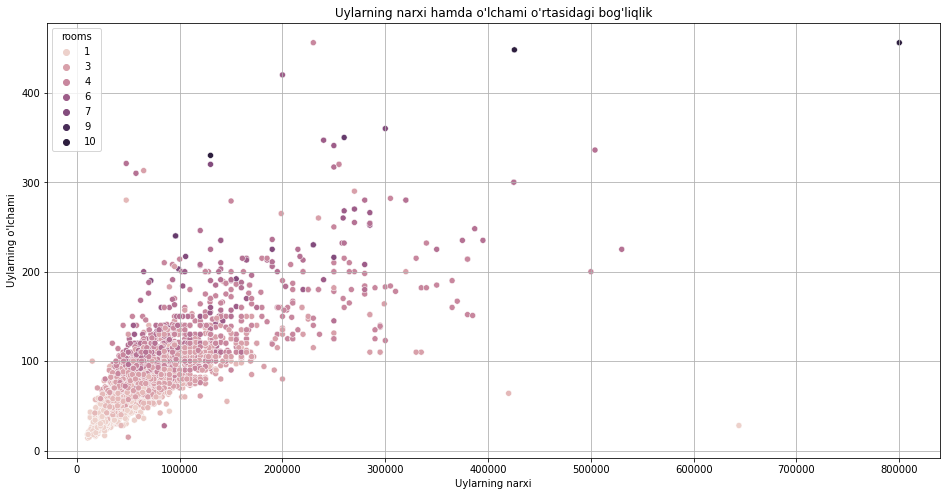

In [18]:
plt.figure(figsize=(16,8))
plt.title("Uylarning narxi hamda o'lchami o'rtasidagi bog'liqlik")
plt.xlabel("Uylarning narxi")
plt.ylabel("Uylarning o'lchami")
plt.grid()
sns.scatterplot(data=df, x='price', y='size', hue='rooms')

plt.show()

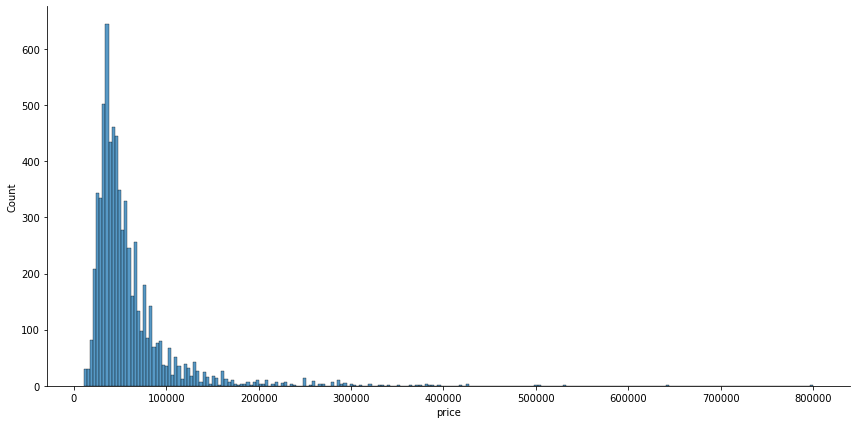

In [21]:
sns.displot(data=df, x='price', height=6, aspect=2)
plt.show()

In [39]:
obj = df['district'].value_counts() 
obj

Chilonzor        1476
Mirzo Ulugbek    1201
Yunusobod         810
Uchtepa           793
Mirobod           696
Yakkasaroy        551
Yashnobod         441
Shayhontohur      340
Olmzor            248
Sergeli           148
Yangihayot         13
Bektemir            8
Name: district, dtype: int64

In [42]:
a = obj.index

In [43]:
b = obj.values

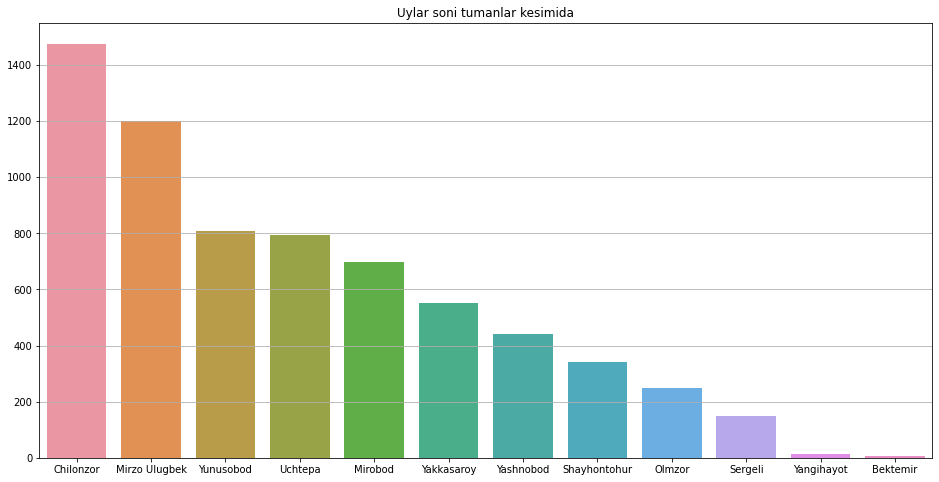

In [44]:
plt.figure(figsize=(16,8))
plt.grid()
plt.title("Uylar soni tumanlar kesimida")
sns.barplot(x=a, y=b)
plt.show()